# Les equation différentielles avec Python


# Introduction
Tentative de simplification <b>extrême</b> de la résolution d'équations différentielles avec Python, avec un <b>cas pratique systématique</b>, un exemple de <b>la vie réelle</b>. On débute avec ce qui est le plus simple possible.

*  Création en cours * SUJET A LOURDES MODIFICATIONS

# Les phrases les plus simples du monde pour comprendre les eq diffs.

- Plus la vitesse d'une auto est grande, plus le frottement de l'air est fort
- Plus la population est grande, plus la vitesse d'accroissement de la population est grande

# Comprendre ce qu'est l'équation différentielle la plus simple: 

"Dans un référentiel de temps,
La vitesse de variation d'une quantité est proportionnelle à cette quantité même ."

Admettons qu'une population croies de 100% par unité de temps
Par exemple, si au temps 1, la population est de 1,
au temps 2 elle sera de 2, et au temps 3 de 4. ( Acroissement constant)
La vitesse de variation de la population est donc proportionnelle à la quantité de population.
On reconnait là une suite géométrique, mais peut on traiter ce problème avec une equation différentielle ?

Hypothèse : 
Résoudre l'equation différentielle, c'est tracer cette fonction permet de savoir quelle sera la population au temps 10.

# Notation
Il y en a 2 différentes , pour dire la même chose.

<b>En maths : </b>
y' = a * y

ou

- y' veut dire dérivée de la fonction y ( C'est la pente de cette fonction en un point précis),
vu qu'il y a plusieurs unités de temps, il y en a plusieurs.
- y est une fonction inconnue
- a est une constante réelle

<b>En physique</b>

dx/dt = C

ou 

- x est une variable
- t est une variable
- C est une constante .

Nous pensons souvent que t mesure le temps et x mesure une quantité positive au fil du temps. Autrement dit, x est fonction du temps.
Le nombre k est appelé taux de croissance continue s’il est positif, ou taux de décroissance continue s’il est négatif.
http://amsi.org.au/ESA_Senior_Years/SeniorTopic3/3e/3e_2content_1.html

# Les méthodes de résolution en Python

- Euler explicite ( Il faut la coder) : https://www.youtube.com/watch?v=LkMuRtk1Qg4
- Scipy : https://www.youtube.com/watch?v=UY8LvjQGKGE

# Problème de Cauchy

C'est quand on donne des conditions initiales à l'équation différentielle.



# Exemple 1.

## Equation y' = a * y

## Notre cas pratique.

Admettons qu'une population croies de 100% par unité de temps
Par exemple, si au temps 1, la population est de 1,
au temps 2 elle sera de 2, et au temps 3 de 4. ( Acroissement constant)
La vitesse de variation de la population est donc proportionnelle à la quantité de population.
On reconnait là une suite géométrique, mais peut on traiter ce problème avec cette equation différentielle ?

y' = a * y

## Solutions Avec Scipy solve_ivp

Il existe 2 types de solutions , la solution numérique, et la solution graphique.

On va prendre cet exemple de code de population qui grandit, et voir si cela fonctionne :
https://www.epythonguru.com/2020/09/ODE-Growth-model-in-Python.html



Solution fausse :  Ne fonctionne pas , donne un résultat approximatif
Résolution en cours !!!
Hypothèse : Vu que ça retourne des dérivées, c'est pour ça que ce n'est pas exact, ça donne une approximation. Ca donne des valeurs continues, et pas discrètes ...



[1 2 3]
[[1.        ]
 [2.71828198]
 [7.38905659]]


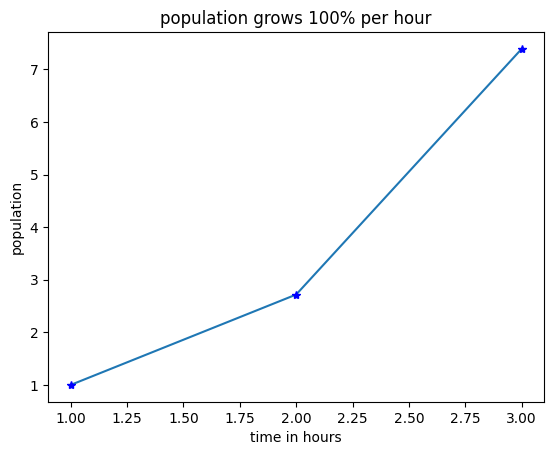

In [123]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt
k = 1 # Le taux de 100% d'accroissement
def f(y,x): # Retourne les dérivées pour chaque point
    return k*y
xs = np.arange(1,4) ## Point de départ, nb de points
yO = 1 # Etat initial de la population
ys = odeint(f,yO,xs)
print(xs)
print(ys)
for i in xs:
    if i==5 or i==10:
        k = int(i)
        print ('pop'+str(i)+str(ys[k]))

plt.plot(xs,ys)
plt.plot(xs,ys,'b*')
plt.xlabel('time in hours')
plt.ylabel('population')
plt.title('population grows 100% per hour')
plt.show()

# Solution de Nick ODell sur Stack Overflow

[1 2 3]
[[1.        ]
 [2.00000005]
 [4.00000021]]


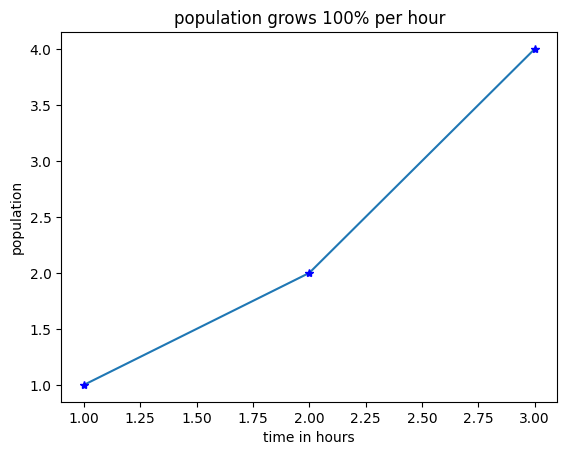

In [124]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

# Another idea would be to pick a k value such that the 
# value of this series doubles every time step. 
# The expression k = ln(j + 1) gives you the k value 
# required to have this ODE increase by a factor of j at each time step. 
# This means that if you set k = 0.6931471805599453 in this ODE, 
# then the value at each time step doubles. – 
# Nick ODell
# 17 mins ago

k = 0.6931471805599453 # Le taux de 100% d'accroissement avec la formule du Logaritme de Nick ODell
def f(y,x): # Retourne les dérivées pour chaque point
    return k*y
xs = np.arange(1,4) ## Point de départ, nb de points
yO = 1 # Etat initial de la population
ys = odeint(f,yO,xs)
print(xs)
print(ys)
for i in xs:
    if i==5 or i==10:
        k = int(i)
        print ('pop'+str(i)+str(ys[k]))

plt.plot(xs,ys)
plt.plot(xs,ys,'b*')
plt.xlabel('time in hours')
plt.ylabel('population')
plt.title('population grows 100% per hour')
plt.show()

# Essai avec un autre code

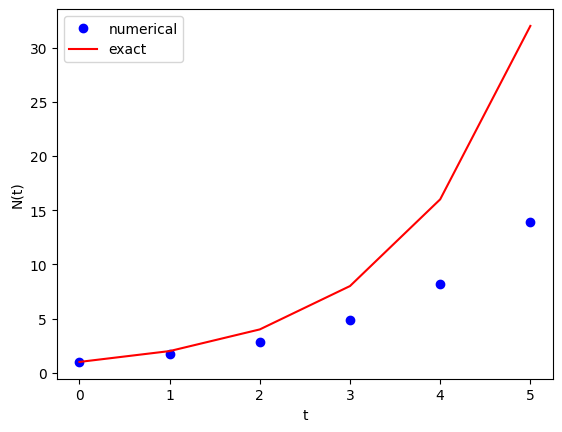

In [125]:

# N_0 = input('Give initial population size N_0: ')
# r   = input('Give net growth rate r: ')
# dt  = input('Give time step size: ')
# N_t = input('Give number of steps: ')

from numpy import linspace, zeros, exp

N_0 = 1 # Population initiale
r   = 0.6931471805599453 # Croissance de la population en %
dt  = 1 # Echelle de temps
N_t = 5 # Nombre de pas


t = linspace(0, N_t*dt, N_t+1)
N = zeros(N_t+1)

N[0] = N_0
for n in range(N_t):
    N[n+1] = N[n] + r*dt*N[n]

import matplotlib.pyplot as plt

numerical_sol = 'bo' if N_t < 70 else 'b-'
plt.plot(t, N, numerical_sol, t, N_0*exp(r*t), 'r-')
plt.legend(['numerical', 'exact'], loc='upper left')
plt.xlabel('t'); plt.ylabel('N(t)')
filestem = 'img/growth1_%dsteps' % N_t
plt.savefig('%s.png' % filestem); plt.savefig('%s.pdf' % filestem)